In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42) 
path = Path("plots/")
path.mkdir(exist_ok=True)

In [39]:
x_inf = 1
x_0 = 0
a = 0.5
b = 0.5

def simulate_ou(T, size, dt, x_0, x_inf, a, b):
    n_intervals = int(T/dt)
    x= np.zeros((size, n_intervals))
    x[:,0] = x_0
    for i in range(1, n_intervals):
        t = i*dt
        dw = np.sqrt(dt) * np.random.normal(0, 1, size)
        x[:,i] = x[:,i-1] -a*(x[:,i-1]-x_inf)*dt + b*dw
    return x

Text(0, 0.5, 'Value')

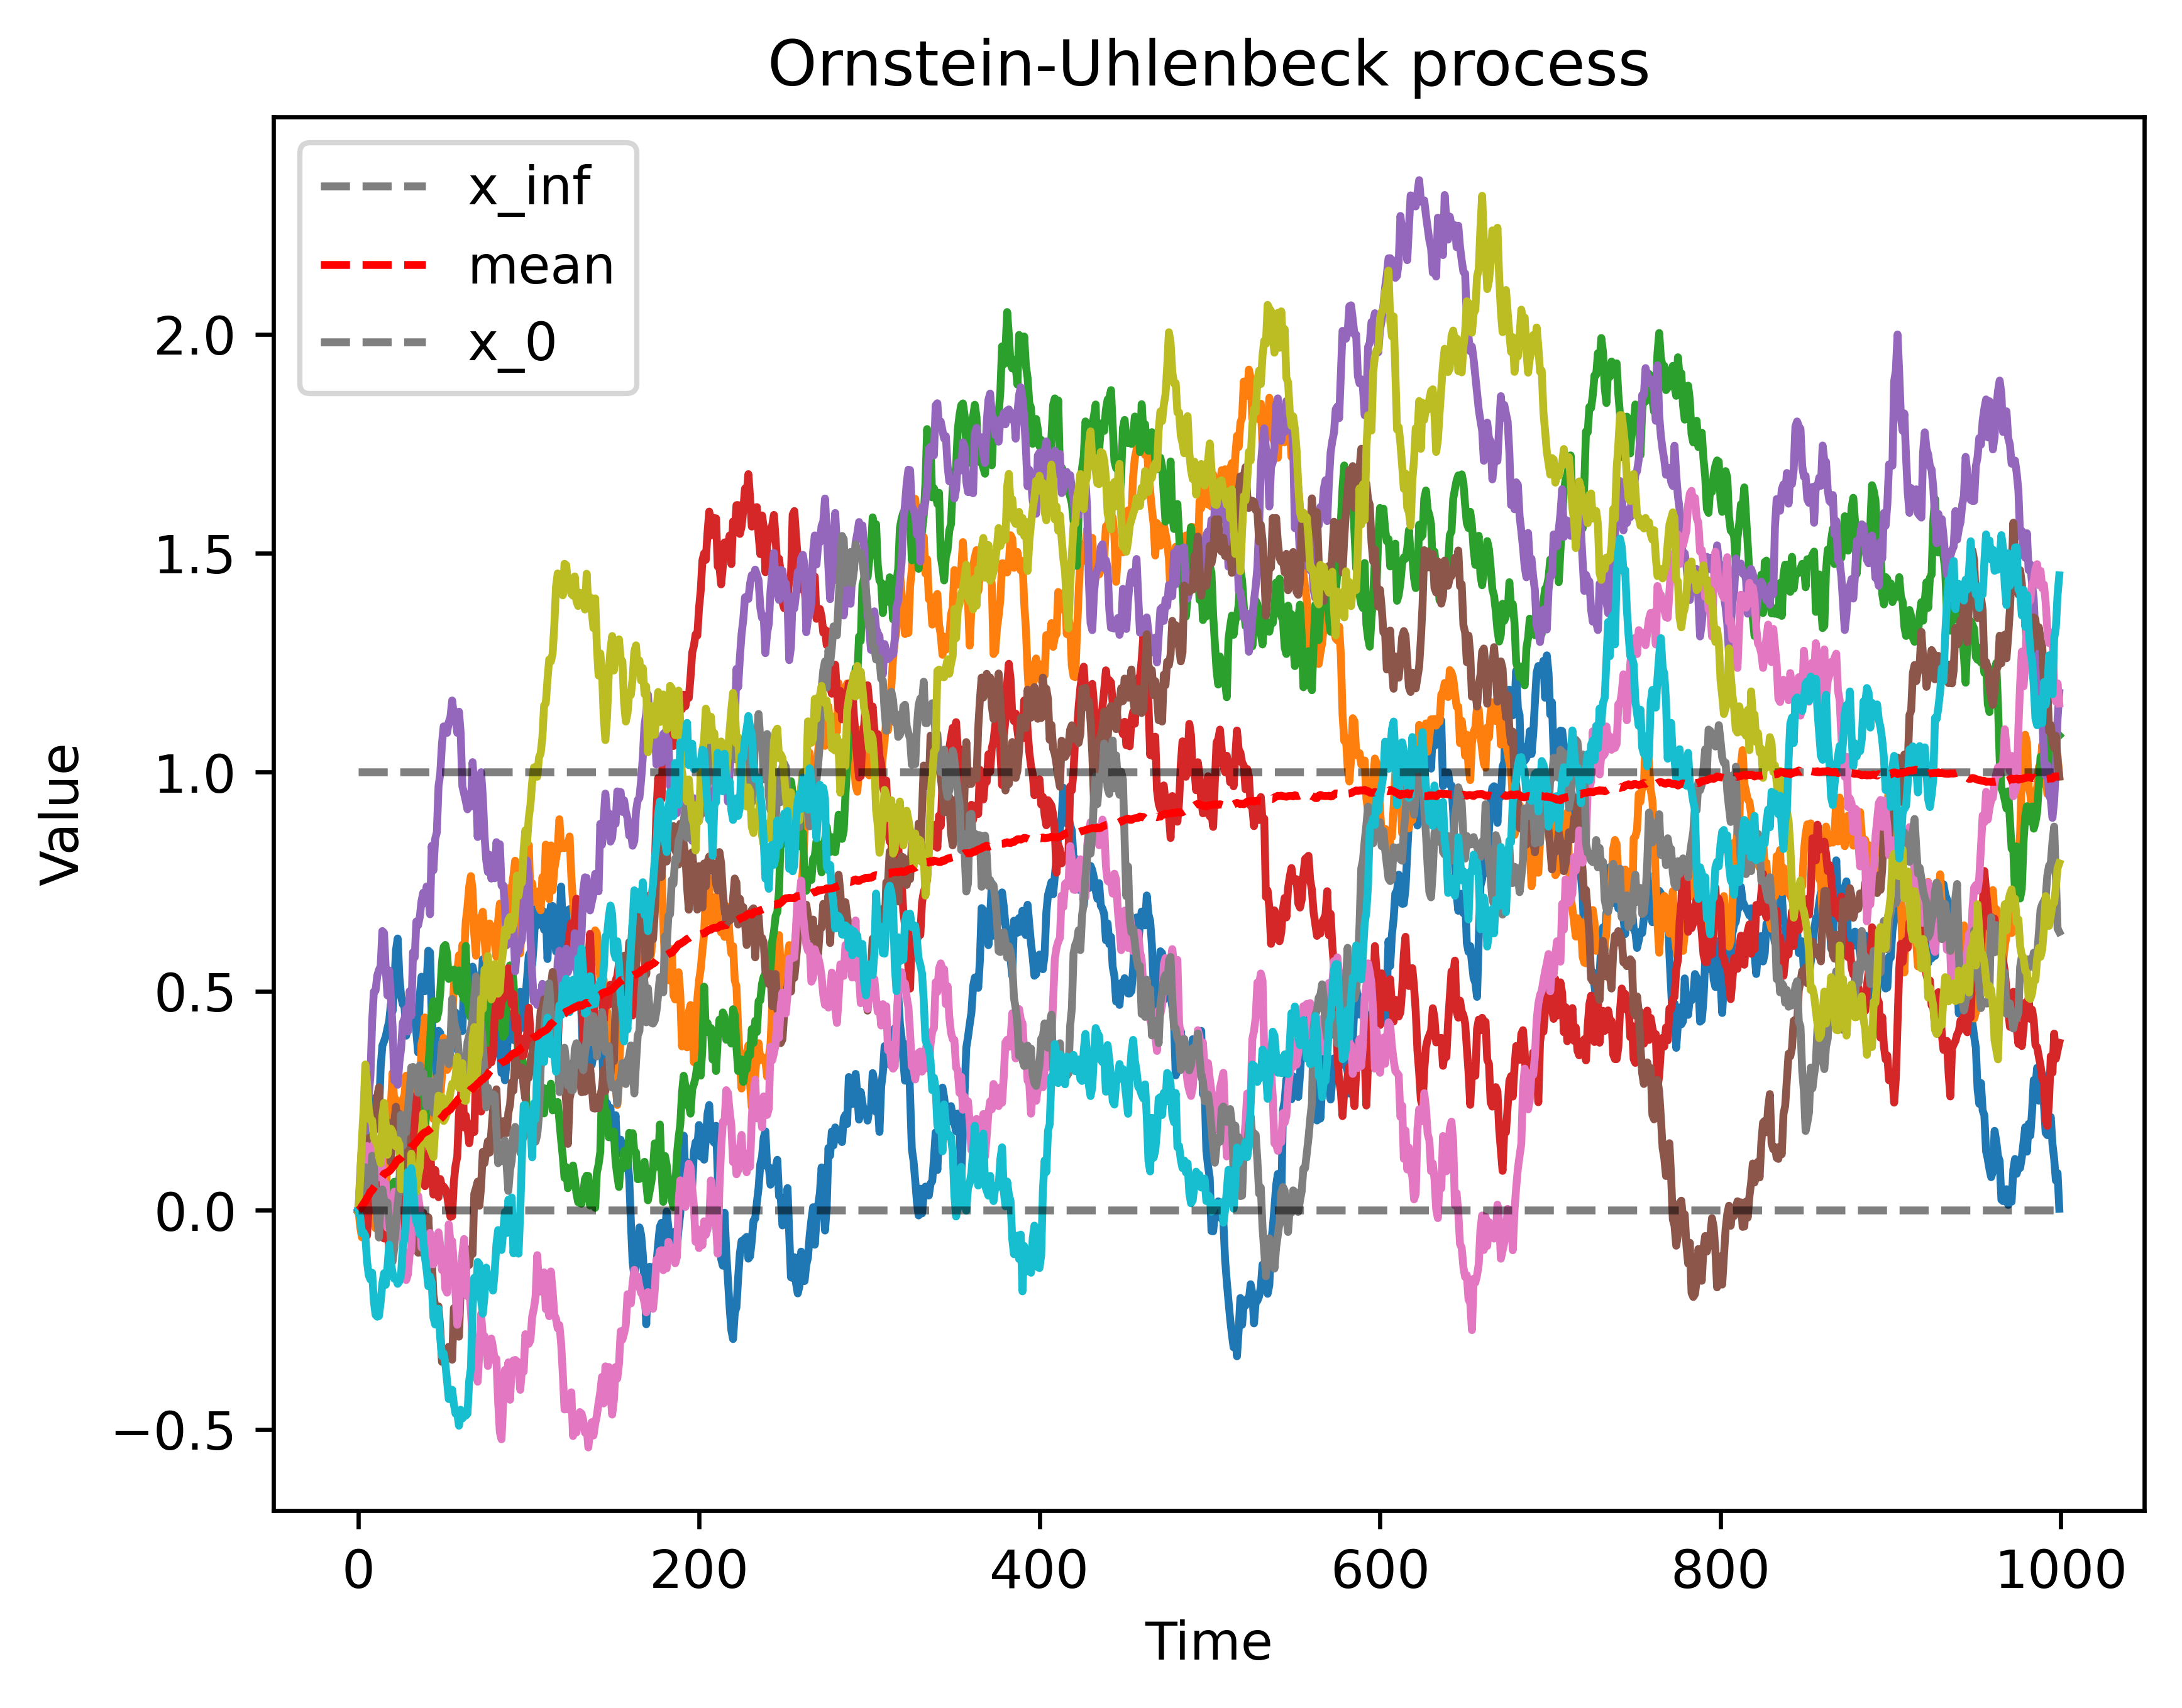

In [40]:
T = 10
size = 1000
dt = 0.01
x = simulate_ou(T, size, dt, x_0, x_inf, a, b)

plt.figure(dpi=600)
plt.plot(x.T[:,:10])
# plot the line x_inf
plt.plot(np.ones(x.shape[1])*x_inf, 'k--', alpha=0.5, label='x_inf')
# plot the mean of the process
plt.plot(np.mean(x, axis=0), 'r--', label='mean')
# plot x_0
plt.plot(np.ones(x.shape[1])*x_0, 'k--', alpha=0.5, label='x_0')
plt.legend()
plt.title('Ornstein-Uhlenbeck process')
plt.xlabel('Time')
plt.ylabel('Value')
# plt.savefig(path / 'ou_process.png')

In [41]:
def cov(x,y):
    return np.mean(x*y) - np.mean(x)*np.mean(y)

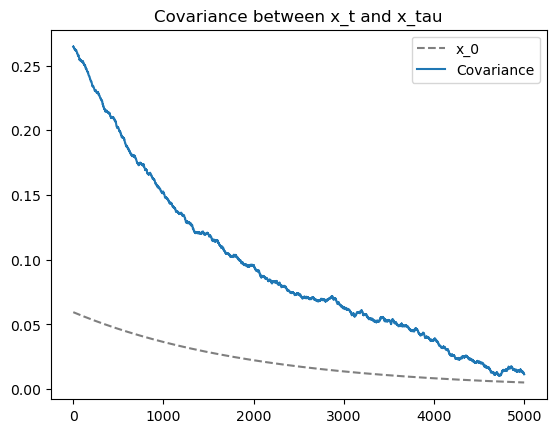

In [45]:

x_inf = 1
x_0 = 0
a = 0.5
b = 0.5
T = 10
size = 1000
x = simulate_ou(T, size, dt/10, x_0, x_inf, a, b)

T_size = x.shape[1]
t = T_size//2
x_t = x[:, t]


covariance = []
for i in range(t+1, T_size):
    x_tau = x[:,i]
    covariance.append(np.cov(x_t, x_tau)[0,1])
    # covariance.append(cov(x_t, x_tau))
    
plt.title('Covariance between x_t and x_tau')
def analytic_cov(t, s):
    return b**2/2*a * ( np.exp(-a*(t-s)) -  np.exp(-a*(s+t)))

plt.plot([analytic_cov(t+tau, t) for tau in np.linspace(0.1, T- T/2, num=len(covariance))], 'k--', alpha=0.5, label='x_0')
plt.plot(covariance, label='Covariance')
plt.legend()
plt.savefig(path / 'covariance.png')

In [6]:
x.shape

(1000, 10000)